In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [60]:
df = [train,test]

In [61]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

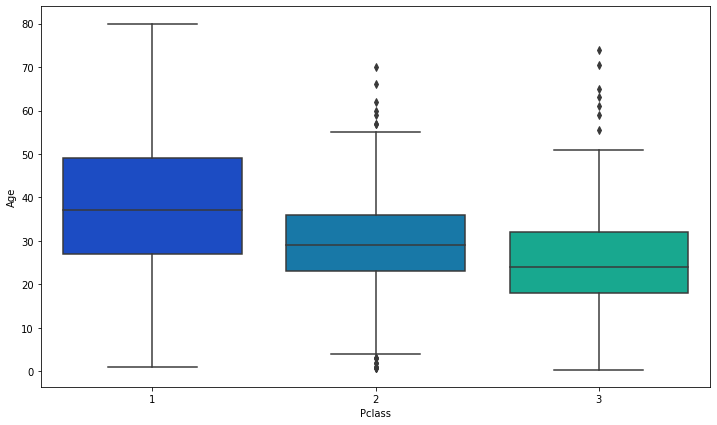

In [62]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [63]:
def complete_age(cols):
    Age=cols[0]
    PClass=cols[1]
    
    if pd.isnull(Age):
        if PClass == 1:
            return 37
        elif PClass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [64]:
for data in df:
    print(data.isnull().sum())
    data['Age']=data[['Age','Pclass']].apply(complete_age,axis=1)
    data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
    data['Fare'].fillna(data['Fare'].mean(),inplace=True)
    data['Cabin']=data['Cabin'].fillna("Unknown")
    data['Deck']=data['Cabin'].str.get(0)
train.info()
test.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket 

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for data in df:
    data['Sex']=le.fit_transform(data['Sex'])
    data['Embarked']=le.fit_transform(data['Embarked'])
    data['Name']=data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
    Title_Dict = {}
    Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
    Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
    Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
    Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
    Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
    Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
    data['Title'] = data['Name'].map(Title_Dict)
    data['Title']=le.fit_transform(data['Title'])
    data['Fare']=(data['Fare']-data['Fare'].min())/(data['Fare'].max()-data['Fare'].min())
    data['FamilySize']=data['Parch']+data['SibSp']+1
    data['Deck']=le.fit_transform(data['Deck'])
    data['TravelAlone']=np.where(data['FamilySize']>1, 0, 1)
#     data['FamilyLabel']=data['FamilySize'].apply(label)
    Ticket_Count = dict(data['Ticket'].value_counts())
    data['TicketGroup'] = data['Ticket'].apply(lambda x:Ticket_Count[x])#.apply(label)

In [66]:
df

[     PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  \
 0              1         0       3    Mr    1  22.0      1      0   
 1              2         1       1   Mrs    0  38.0      1      0   
 2              3         1       3  Miss    0  26.0      0      0   
 3              4         1       1   Mrs    0  35.0      1      0   
 4              5         0       3    Mr    1  35.0      0      0   
 ..           ...       ...     ...   ...  ...   ...    ...    ...   
 886          887         0       2   Rev    1  27.0      0      0   
 887          888         1       1  Miss    0  19.0      0      0   
 888          889         0       3  Miss    0  24.0      1      2   
 889          890         1       1    Mr    1  26.0      0      0   
 890          891         0       3    Mr    1  32.0      0      0   
 
                Ticket      Fare    Cabin  Embarked  Deck  Title  FamilySize  \
 0           A/5 21171  0.014151  Unknown         2     8      2           2  

In [67]:
train.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1,inplace=True)

In [68]:
X=train.drop(['Survived'],axis='columns').values
Y=train['Survived'].values

In [69]:
Y_test.shape

(179,)

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
Y_pred = classifier.predict(X_test)

In [1]:
Y_pred

NameError: name 'Y_pred' is not defined

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[104  18]
 [ 20  37]]
0.7877094972067039


In [74]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

random_grid={
    'n_estimators' : [50,100,150,200,300,400,500],
    'max_depth' : [5,10,20,30,40,50],
    'bootstrap' : [True,False],
    'max_features' : ['auto','sqrt'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split' : [2,4,6,8,10]
}

In [75]:
clf=RandomForestClassifier()
random_model=RandomizedSearchCV(estimator = clf, param_distributions = random_grid, cv = 5, verbose=2, n_jobs = -1)

In [76]:
random_model.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [77]:


random_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': True}

In [78]:
best_random = random_model.best_estimator_

In [79]:
y_pred = best_random.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

0.8212290502793296
[[112  10]
 [ 22  35]]


In [81]:
grid_param ={
    'n_estimators' : [50,60,70,80,90,100,110,120],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [1,2,3,4,5,6,7],
    'min_samples_split' : [1,2,3,4,5,6,7,8,9,10],
    'bootstrap' : [False]
}

In [82]:
clf1= RandomForestClassifier()
grid_model = GridSearchCV(estimator=clf1,param_grid=grid_param,n_jobs=-1,verbose=2,cv=5)
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1164 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1529 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1974 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2501 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3108 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3797 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 4566 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 5417 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 6348 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 7361 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 8454 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 9629 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [29]:
grid_model.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 80}

In [30]:
best_grid = grid_model.best_estimator_

In [33]:
pred = best_grid.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[95 15]
 [17 52]]
0.8212290502793296


In [39]:
model = RandomForestClassifier(bootstrap= True,max_depth= 5, max_features= 'sqrt', min_samples_leaf= 1,min_samples_split= 9, n_estimators= 90)

In [40]:
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
pred = best_grid.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[95 15]
 [17 52]]
0.8212290502793296


In [42]:
preds = model.predict(test.values)
samp= pd.read_csv('sample_submission1.csv')
samp['Survived']=preds
samp['Survived'].value_counts()

0    246
1    172
Name: Survived, dtype: int64

In [44]:
re_samp = pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
samp['Survived'].value_counts()

0    246
1    172
Name: Survived, dtype: int64

In [49]:
re_samp['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [50]:
samp.to_csv('sample_submission2.csv',index=False)